# Задачи

1. Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.

2. Какой клиент совершил больше всего успешных операций? (success == True)

3. С какой платформы осуществляется наибольшее количество успешных операций?

4. Какую платформу предпочитают премиумные клиенты?

5. Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

6. Постройте график распределения числа успешных операций

7. Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?

---

In [1]:
# 1
import pandas as pd

user_data = pd.read_csv('3_user_data.csv')
logs      = pd.read_csv('3_logs.csv')

In [2]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [3]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [4]:
user_data.shape

(2954, 3)

In [5]:
logs.shape

(4500, 4)

In [6]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [7]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [8]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [9]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [10]:
# 2
logs.query('success == True').groupby('client').agg({'success':'count'}) \
    .sort_values('success', ascending=False).head(10)

,success
client,
12179,41
61468,41
52870,41
61473,41
92584,41
82563,41
78349,41
36165,41
28719,41


In [11]:
# (...) Таких клиентов оказалось 9. Их ID:
# 12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584

In [12]:
# 3
logs.query('success == True').groupby('platform').agg({'success':'count'}) \
    .sort_values('success', ascending=False)

,success
platform,
phone,2019
computer,1090
tablet,180


In [13]:
# (...) с платформы Phone

In [14]:
# 4
premium_clients = logs.merge(user_data.query('premium == True'), how='right', on='client')
premium_clients.platform.value_counts()

platform
phone       246
computer    150
tablet       24
Name: count, dtype: int64

In [15]:
# (...) Платформа Phone

/tmp/ipykernel_5099/4261990306.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(user_data.query('premium == False').age)
/tmp/ipykernel_5099/4261990306.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(user_data.query('premium == True').age)


<Axes: xlabel='age', ylabel='Density'>

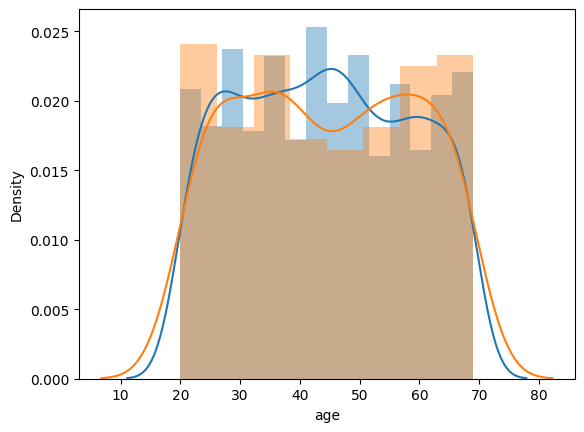

In [18]:
# 5
import seaborn as sns

sns.distplot(user_data.query('premium == False').age)
sns.distplot(user_data.query('premium == True').age)

/tmp/ipykernel_5099/2037440472.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(client_vs_suc_number, kde=False)


<Axes: >

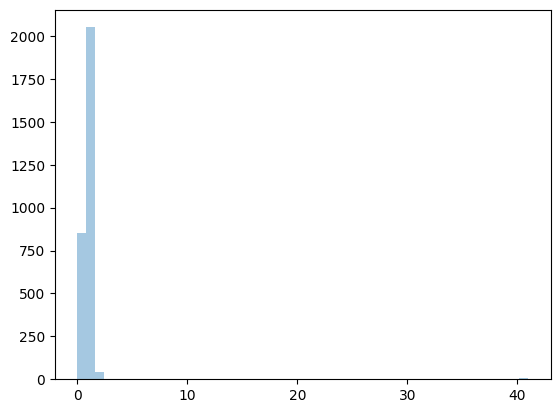

In [25]:
# 6
data = user_data.merge(logs, on='client', how='left')
client_vs_suc_number = data.groupby('client') \
                           .agg({'success':'sum'})
sns.distplot(client_vs_suc_number, kde=False)

In [26]:
client_vs_suc_number.success.value_counts()

success
1     2051
0      850
2       42
41       9
40       1
3        1
Name: count, dtype: int64

In [30]:
# 7
age_vs_suc_num = data.query('platform == "computer"') \
                     .groupby('age', as_index=False) \
                     .agg({'success':'sum'})

<Axes: xlabel='age', ylabel='success'>

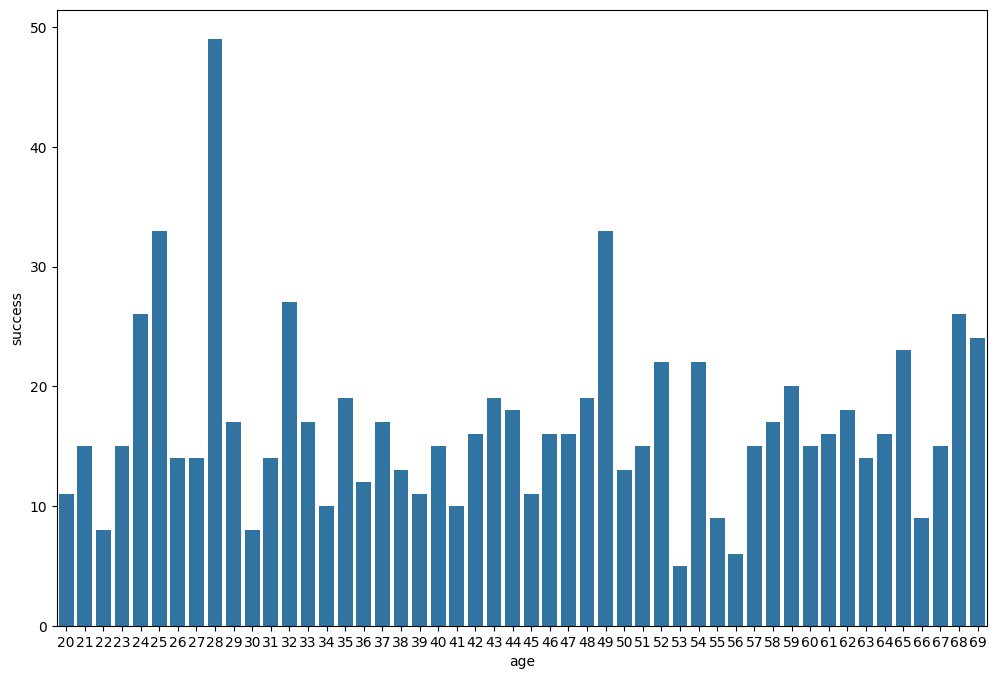

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.barplot(x=age_vs_suc_num.age, y=age_vs_suc_num.success)